The transmission rate is:  0.3
The recovery rate is:  0.15
---------------------------------
Population is:  1000
Number of people could be infected at the inital state is:  980
Number of infected people at the initial state is:  20
---------------------------------
The basic reproduction number is:  2.0
The novel coronavirus has estimated R0 to be around 2.28
---------------------------------


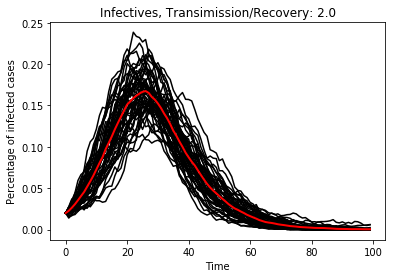

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the ininital value
beta = 0.3
gamma = 0.15
N = 1000
print('The transmission rate is: ', beta)
print('The recovery rate is: ', gamma)
print('---------------------------------')

# Initial condition is 
print('Population is: ', N)
s0 = 980
print('Number of people could be infected at the inital state is: ', s0)
i0 = N - s0
print('Number of infected people at the initial state is: ', i0)
print('---------------------------------')

# Basic reproduction number
R0 = beta/gamma
print('The basic reproduction number is: ', R0)
print('The novel coronavirus has estimated R0 to be around 2.28')
print('---------------------------------')

# Simulation
T = 100
state = np.zeros((2,T))
state[:,0] = np.array([s0, i0])

# Infectious cases
num_path = 50
I = np.zeros((num_path, T))

for path in range(num_path):
    state = np.zeros((2,T))
    state[:,0] = np.array([s0, i0])
    for t in range(1,T):
        F = np.array([[-beta * state[0,t-1] * state[1,t-1]/N], 
                      [beta * state[0,t-1] * state[1,t-1]/N - gamma * state[1,t-1]]])
        G = np.array([[-np.sqrt(beta * state[0,t-1] * state[1,t-1]/N), 0],
                      [np.sqrt(beta * state[0,t-1] * state[1,t-1]/N), -np.sqrt(gamma * state[1,t-1])]])
        state[:,t] += state[:,t-1] + (F + G @ np.random.multivariate_normal(np.zeros(2), np.eye(2)).reshape(2,1)).flatten()
        if state[1, t] < 0:
            break
    I[path] = state[1,:]
    
# Visualize
plt.figure()
for path in range(num_path):
    plt.plot(I[path]/N, 'k-')
plt.plot(np.mean(I, axis = 0)/N, 'r', linewidth = 2)
plt.xlabel('Time')
plt.ylabel('Percentage of infected cases')
plt.title('Infectives, Transimission/Recovery: ' + str(R0))
plt.show()